In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [4]:
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# label encode species 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['species']=encoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


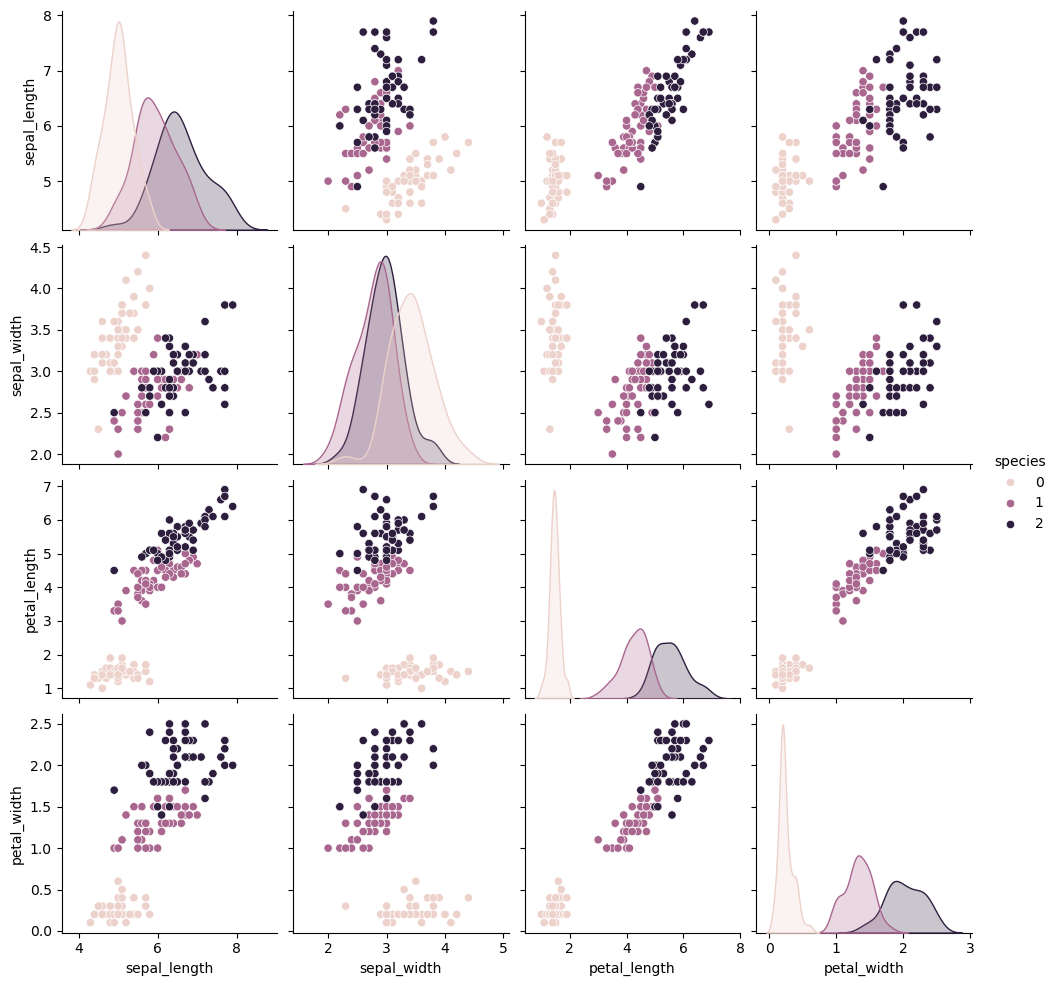

In [14]:
sns.pairplot(df,hue='species')  #used for plot all the pairs 

In [16]:
# creating new data set for understanding the use of voting ensemble 
new_df=df[df['species']!=0][['sepal_length','sepal_width','species']]

In [18]:
new_df.head()

,sepal_length,sepal_width,species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [24]:
X=new_df.iloc[:,0:2]
y=new_df.iloc[:,-1]

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [30]:
clf1=LogisticRegression()
clf2=RandomForestClassifier()
clf3=KNeighborsClassifier()

In [34]:
# list of tuple for estimator hyper-parameter
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [36]:
for estimator in estimators:
    x=cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.75
rf 0.6
knn 0.62


In [38]:
from sklearn.ensemble import VotingClassifier

### Hard Voting

In [41]:
vc=VotingClassifier(estimators=estimators,voting='hard')
x=cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.68


### Soft Voting

In [44]:
vc=VotingClassifier(estimators=estimators,voting='soft')
x=cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.67


### Weighted Voting

In [47]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc=VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x=cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={}, j={}, k={}".format(i,j,k),np.round(np.mean(x),2))

for i=1, j=1, k=1 0.65
for i=1, j=1, k=2 0.64
for i=1, j=1, k=3 0.66
for i=1, j=2, k=1 0.62
for i=1, j=2, k=2 0.63
for i=1, j=2, k=3 0.65
for i=1, j=3, k=1 0.62
for i=1, j=3, k=2 0.62
for i=1, j=3, k=3 0.64
for i=2, j=1, k=1 0.67
for i=2, j=1, k=2 0.68
for i=2, j=1, k=3 0.67
for i=2, j=2, k=1 0.64
for i=2, j=2, k=2 0.64
for i=2, j=2, k=3 0.66
for i=2, j=3, k=1 0.66
for i=2, j=3, k=2 0.64
for i=2, j=3, k=3 0.64
for i=3, j=1, k=1 0.7
for i=3, j=1, k=2 0.69
for i=3, j=1, k=3 0.68
for i=3, j=2, k=1 0.69
for i=3, j=2, k=2 0.66
for i=3, j=2, k=3 0.65
for i=3, j=3, k=1 0.66
for i=3, j=3, k=2 0.64
for i=3, j=3, k=3 0.65


In [52]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
X,y=make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=2)

svm1=SVC(probability=True,kernel='poly',degree=1)
svm2=SVC(probability=True,kernel='poly',degree=2)
svm3=SVC(probability=True,kernel='poly',degree=3)
svm4=SVC(probability=True,kernel='poly',degree=4)
svm5=SVC(probability=True,kernel='poly',degree=5)
svm6=SVC(probability=True,kernel='poly',degree=6)

estimators=[('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5),('svm6',svm6)]

for estimator in estimators:
    x=cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86
svm6 0.72


In [62]:
vc1=VotingClassifier(estimators=estimators,voting='soft')
x=cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
